##### İki farklı kategorik değişken, bir sürekli bağımlı değişken
##### Her grup normal dağılmalı
##### Varyanslar eşit veya homojen olmalı
##### Gözlemler bağımsız olmalı
##### H0: M1 = M2 = M3 = ....... = Mk
##### H1: En az bir grup ortalaması farklıdır.

### 3 farklı gübre ve 4 farklı tohumun verdiği mahsullerin verimleri arasında ist. ol. anl. fark. var mıdır?

In [2]:
import pandas as pd

In [2]:
data = pd.read_excel("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/gubre_verim.xlsx")
data.head()

,Gübre,Tohum,Verim
0,a,x,4.366966
1,a,y,2.968899
2,a,z,2.593462
3,a,w,2.677686
4,b,x,1.178191


In [4]:
a = data[data["Gübre"] == "a"]["Verim"]
b = data[data["Gübre"] == "b"]["Verim"]
c = data[data["Gübre"] == "c"]["Verim"]

In [5]:
x =  data[data["Tohum"] == "x"]["Verim"]
y =  data[data["Tohum"] == "y"]["Verim"]
z =  data[data["Tohum"] == "z"]["Verim"]
w =  data[data["Tohum"] == "w"]["Verim"]

#### Normallik Testi
#### H0: Veriler normal dağılım göstermektedir.
#### H1: Veriler normal dağılım göstermemektedir.

In [4]:
from scipy import stats

In [8]:
stats.shapiro(a)

ShapiroResult(statistic=0.8792700171470642, pvalue=0.08578003942966461)

In [9]:
stats.shapiro(b)

ShapiroResult(statistic=0.9385117888450623, pvalue=0.5365753173828125)

In [10]:
stats.shapiro(c)

ShapiroResult(statistic=0.8462140560150146, pvalue=0.08719556778669357)

In [11]:
# pvalues > 0.05 H0 reddedilemez. Gübre değişkeni için veriler normal dağılım gösterir.

In [12]:
stats.shapiro(x)

ShapiroResult(statistic=0.9010403156280518, pvalue=0.2952439785003662)

In [13]:
stats.shapiro(y)

ShapiroResult(statistic=0.909741997718811, pvalue=0.3522500693798065)

In [14]:
stats.shapiro(z)

ShapiroResult(statistic=0.887331485748291, pvalue=0.26103076338768005)

In [15]:
stats.shapiro(w)

ShapiroResult(statistic=0.8098072409629822, pvalue=0.05114585533738136)

In [16]:
# pvalues > 0.05 H0 reddedilemez. Tohum değişkeni için veriler normal dağılım gösterir.

#### Varyans Homojenliği Testi
#### H0: Varyanslar homojendir.
#### H1: Varyanslar homojen değildir.

In [17]:
stats.levene(a, b, c)

LeveneResult(statistic=0.9623344962444635, pvalue=0.3947184688097196)

In [18]:
# pvalue > 0.05 H0 reddedilemez. Gübre değişkeni için varyanslar homojendir.

In [19]:
stats.levene(x, y, z, w)

LeveneResult(statistic=0.8312442910868285, pvalue=0.4888125358339117)

In [20]:
# pvalue > 0.05 H0 reddedilemez. Tohum değişkeni için varyanslar homojendir.

#### Çift yönlü anova testi

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
model = "Verim ~ C(Gübre) +  C(Tohum) + C(Gübre) : C(Tohum)"
test = ols(model, data=data).fit()
anova = sm.stats.anova_lm(test, type=2)
print(anova)

                     df     sum_sq   mean_sq         F    PR(>F)
C(Gübre)            2.0   2.849583  1.424791  2.153585  0.145028
C(Tohum)            3.0   0.013900  0.004633  0.007003  0.999163
C(Gübre):C(Tohum)   6.0   5.845714  0.974286  1.472642  0.242969
Residual           18.0  11.908629  0.661591       NaN       NaN


In [1]:
# PR(>F) > 0.05 old. için H0 reddedilemez. Ortalamalar arasında ist. ol. anl. fark. yoktur.

### Çalışanların mevkileri ve çalışma sürelerinin performansları üzerinde anlamlı bir etkisi var mıdır?

In [3]:
data = pd.read_excel("C:/Users/htcso/OneDrive/Masaüstü/pythonProject/datasets/performans.xlsx")
data.head()

,Mevki,Süre,Performans
0,İşçi,Bir Ay,7
1,İşçi,Beş Ay,5
2,İşçi,Bir Yıl,4
3,İşçi,Üç Yıl ve Üzeri,2
4,İşçi,Bir Ay,5


In [6]:
import statsmodels.stats as ss
import matplotlib.pyplot as plt

In [9]:
model = ols("Performans ~ C(Mevki) + C(Süre) + C(Mevki) : C(Süre)", data=data).fit()
errors = model.resid

#### Normallik Kontrolü (Hatalar ve Grafik Yöntemi ile)

In [10]:
# Hata Yöntemi
normality = stats.shapiro(errors)
normality

ShapiroResult(statistic=0.9807988405227661, pvalue=0.6122861504554749)

In [11]:
# pvalue > 0.05 --> Normal dağılım gösterdiğini söyler.

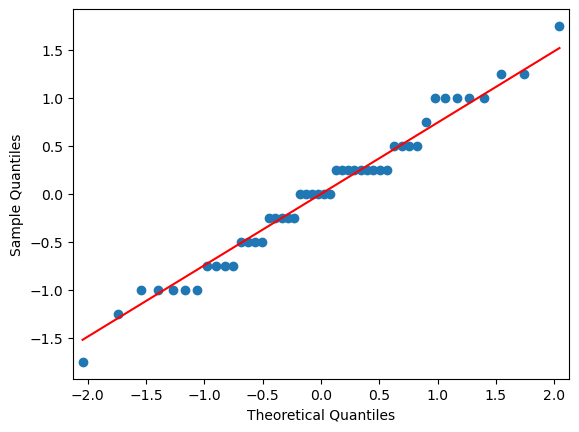

In [15]:
# Grafik Yöntemi ile
fig = sm.qqplot(errors, line="s")
plt.show()

In [16]:
# Veriler genellikle çizgi etrafında bulundğundan dolayı normallik varsayımının sağlandığını söyleyebiliriz.

#### Modelin Anlamlılığı

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Performans   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     30.06
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           7.41e-15
Time:                        10:44:58   Log-Likelihood:                -53.852
No. Observations:                  48   AIC:                             131.7
Df Residuals:                      36   BIC:                             154.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                                           6.5000      0.429     15.152      0.000       5.630       7.370
C(Mevki)[T.Yönetici]                                1.5000      0.607      2.472      0.018       0.270       2.730
C(Mevki)[T.İşçi]                                   -2.0000      0.607     -3.297      0.002      -3.230      -0.770
C(Süre)[T.Bir Ay]                                   0.2500      0.607      0.412      0.683      -0.980       1.480
C(Süre)[T.Bir Yıl]                                 -0.5000      0.607     -0.824      0.415      -1.730       0.730
C(Süre)[T.Üç Yıl ve Üzeri]                         -0.5000      0.607     -0.824      0.415      -1.730       0.730
C(Mevki)[T.Yönetici]:C(Süre)[T.Bir Ay]             -2.2500      0.858     -2.622      0.013      -3.990      -0.510
C(Mevki)[T.İşçi]:C(Süre)[T.Bir Ay]                  0.5000      0.858      0.583      0.564      -1.240       2.240
C(Mevki)[T.Yönetici]:C(Süre)[T.Bir Yıl]             1.7500      0.858      2.040      0.049       0.010       3.490
C(Mevki)[T.İşçi]:C(Süre)[T.Bir Yıl]                -1.2500      0.858     -1.457      0.154      -2.990       0.490
C(Mevki)[T.Yönetici]:C(Süre)[T.Üç Yıl ve Üzeri]     2.2500      0.858      2.622      0.013       0.510       3.990
C(Mevki)[T.İşçi]:C(Süre)[T.Üç Yıl ve Üzeri]        -2.2500      0.858     -2.622      0.013      -3.990      -0.510
==============================================================================
Omnibus:                        0.108   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.947   Jarque-Bera (JB):                0.312
Skew:                           0.038   Prob(JB):                        0.855
Kurtosis:                       2.612   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Prob (F-statistic): 7.41e-15 < 0.05 için modelin anlamlı olduğu sonucu ortaya çıkar.
# Model anlamlı ise anova testine geçilebilir.

#### Anova Testi

In [19]:
anova = sm.stats.anova_lm(model, type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Mevki),2.0,177.541667,88.770833,120.594340,1.105315e-16
C(Süre),3.0,1.583333,0.527778,0.716981,5.483443e-01
C(Mevki):C(Süre),6.0,64.291667,10.715278,14.556604,2.351726e-08
Residual,36.0,26.500000,0.736111,NaN,NaN


In [20]:
# Mevki PR(>F): 1.105315e-16 < 0.05, bu değişkenin tek başına performansa etkisi vardır.
# Süre PR(>F): 5.483443e-01 > 0.05, bu değişkenin tek başına performansa etkisi yoktur. 
# Mevki ve Süre PR(>F): 2.351726e-08 < 0.05 olduğundan, bu iki değişkenin birlikte çalışanların performansları üzerinde
# anlamlı bir etkisi olduğu söylenebilir.
# Mevki değişkeni tek başına ve Mevki-Süre değişkeni birlikte incelenmeli

#### Post Hoc Testleri

In [22]:
mevki = ss.multicomp.pairwise_tukeyhsd(endog=data["Performans"], groups=data["Mevki"])
print(mevki)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
Ustabaşı Yönetici   1.9375 0.0011  0.7098  3.1652   True
Ustabaşı     İşçi    -2.75    0.0 -3.9777 -1.5223   True
Yönetici     İşçi  -4.6875    0.0 -5.9152 -3.4598   True
--------------------------------------------------------


In [23]:
# reject = True ise fark vardır.
# Ustabaşı Yönetici arasında
# Ustabaşı     İşçi arasında
# Yönetici     İşçi arasında performans açısından anlamlı farklılık vardır.

In [24]:
data.groupby("Mevki").mean()

C:\Users\htcso\AppData\Local\Temp\ipykernel_4276\450314150.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby("Mevki").mean()


,Performans
Mevki,
Ustabaşı,6.3125
Yönetici,8.2500
İşçi,3.5625


In [25]:
mevki_ve_sure = ss.multicomp.pairwise_tukeyhsd(endog=data["Performans"], groups=data["Mevki"]+data["Süre"])
print(mevki_ve_sure)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                  group2         meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------------------------
         UstabaşıBeş Ay          UstabaşıBir Ay     0.25    1.0  -1.8675  2.3675  False
         UstabaşıBeş Ay         UstabaşıBir Yıl     -0.5 0.9994  -2.6175  1.6175  False
         UstabaşıBeş Ay UstabaşıÜç Yıl ve Üzeri     -0.5 0.9994  -2.6175  1.6175  False
         UstabaşıBeş Ay          YöneticiBeş Ay      1.5 0.3877  -0.6175  3.6175  False
         UstabaşıBeş Ay          YöneticiBir Ay     -0.5 0.9994  -2.6175  1.6175  False
         UstabaşıBeş Ay         YöneticiBir Yıl     2.75 0.0031   0.6325  4.8675   True
         UstabaşıBeş Ay YöneticiÜç Yıl ve Üzeri     3.25 0.0003   1.1325  5.3675   True
         UstabaşıBeş Ay              İşçiBeş Ay     -2.0 0.0788  -4.1175  0.1175  False
         UstabaşıBeş Ay         

In [32]:
data.groupby(["Mevki", "Süre"]).mean().unstack()

Performans                               
Süre         Beş Ay Bir Ay Bir Yıl Üç Yıl ve Üzeri
Mevki                                             
Ustabaşı        6.5   6.75    6.00            6.00
Yönetici        8.0   6.00    9.25            9.75
İşçi            4.5   5.25    2.75            1.75